<h1>Logistic Regression</h1>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt

<h3>Importing, reading and plotting the training data</h3>

In [15]:
data = pd.read_csv('Formulas and Datasets/admittance.txt', header=None)
#references the first 2 columcs 
X = data.iloc[:,0:2]
#references the last column
y = data.iloc[:,2]
m = len(X)
data.head()


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


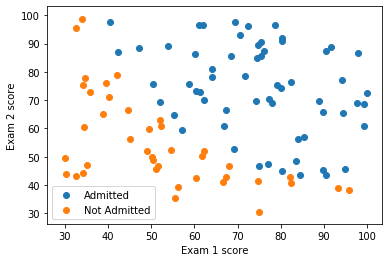

In [12]:
#mask is a boolean function
mask = y == 1
adm = plt.scatter(X[mask][0].values, X[mask][1].values)
not_adm = plt.scatter(X[~mask][0].values, X[~mask][1].values)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted','Not Admitted'))
plt.show()


<h3>Creating functions to compute the sigmoid function, the cost function and the gradient as shown by the formulas below</h3>

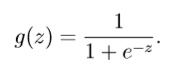

In [16]:
from IPython.display import Image
Image(filename="Formulas and Datasets/sigmoid.png")

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


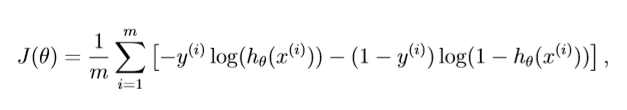

In [17]:
from IPython.display import Image
Image(filename="Formulas and Datasets/cost.png")

In [4]:
def costFunction(theta, X, y):
    J = (-1/m )* np.sum(np.multiply(y,np.log(sigmoid(X @ theta))) + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

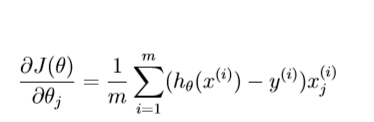

In [18]:
from IPython.display import Image
Image(filename="Formulas and Datasets/gradient.png")

In [5]:
def gradient(theta, X, y):
    return ((1/m)*X.T @ (sigmoid(X @ theta)- y))

In [25]:
(m, n) = X.shape
ones = np.ones((len(X),1))
X = np.hstack((ones, X))
#making y a column vector
y = y[:, np.newaxis]

theta = np.zeros((n+1,1)) # initializing with all the zeros

J = costFunction(theta, X, y)
print(J)

69.31471805599453


<h3>Using opt.fmin_tnc to find the optimized value of theta</h3>

In [7]:
#scipy optimize function,
#flattens turns theta into an array 
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))
theta_optimized = temp[0]
print(theta_optimized)

[-25.16131857   0.20623159   0.20147149]


In [8]:
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print(J)

0.20349770158947478


<h3>Plotting the training data with the decision boundary</h3>

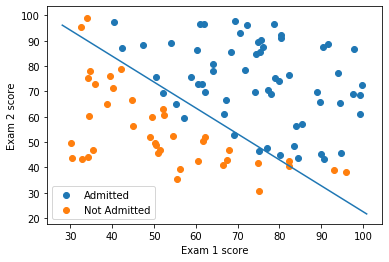

In [9]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0] + np.dot(theta_optimized[1],plot_x))

mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted','Not Admitted'))
plt.show()


In [10]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X,theta))>=cutoff]
    acc = np.mean(pred == y)
    print(acc*100)
    
accuracy(X, y.flatten(), theta_optimized, .5)

89.0
